In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [20]:
GRBs = ['GRB210619B', 'GRB210610B', 'GRB210204A', 'GRB201216C', 'GRB200829A', 'GRB200613A', 'GRB190114C', 'GRB180720B', 'GRB180703A', 'GRB171010A', 'GRB160625B', 'GRB160509A', 'GRB150821A', 'GRB150514A', 'GRB150403A', 'GRB150314A', 'GRB141028A', 'GRB140508A', 'GRB140206A', 'GRB131231A', 'GRB131108A', 'GRB130925A', 'GRB130518A','GRB130427A', 'GRB120119A', 'GRB100728A', 'GRB091003A', 'GRB090926A', 'GRB090618', 'GRB090328', 'GRB081221', 'GRB080916C']

In [21]:
arr = [i.replace('_results.txt', '') for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]

In [22]:
arr.sort( reverse=True)
GRBs.sort(reverse=True)

In [23]:
for i in range(len(GRBs)):
    if GRBs[i] not in arr:
        print(GRBs[i])

In [24]:

err_grb = GRBs
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0)
# for grb in err_grb:
    
    
#     grbname = grb + '.txt'
#     grbname_wtht_ext = grbname.replace('.txt','')


#     arr = np.loadtxt(os.getcwd() + '/asciidataof_fig1/32lag/'+grbname)
#     data = [arr[:,0], arr[:,1], arr[:,2]]
#     x = arr[:,0]
#     y = arr[:,1]
#     yerr = arr[:,2]

#     #Properties of GRB
#     E0 = grbparam[grbname.replace('.txt','')].E0
#     E0rest = E0
#     Erest = arr[:,0]    #in keV
#     z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
#     H0=67.36 #Hubble constant km -1 Mpc s -1
#     omega_m = 0.315
#     omega_l = 1 - omega_m
#     grb
#     #MODELS

#     #NULL model
#     def nullhp(E, alpha, tau):
#         return (1 + z_com)*(tau * ((E ** alpha) - (E0 ** alpha)))
        


#     def int_z(z_prime, n):
#         integ_fn = lambda z: (1+z)**n / np.sqrt(omega_m * (1+z)**3 + omega_l)
#         return quad( integ_fn, a=0, b=z_prime)[0]

#     int_z1 = np.asarray(int_z(z_com, 1))
#     int_z2 = np.asarray(int_z(z_com, 2))

#     #LINEAR model
#     def linearhp(E, logEqg, alpha, tau):
        
#         e0qg = (E - E0) / (10 ** logEqg)
        
#         return (e0qg * int_z1)/H0 + nullhp(E, alpha, tau)

#     #QUADRATIC model
#     def quadhp(E, logEqg, alpha, tau):
#         e0qg = (E**2 - E0 **2) / ((10 ** logEqg)**2)
        
#         return 1.5 * (e0qg * int_z2)/H0 + nullhp(E, alpha, tau)
#     #LOG-LIKELIHOODS
#     def loglike_null(theta):
#         alpha, tau = theta
        
        
#         model = nullhp(x,  alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))
        
        

#     def loglike_linear(theta):
#         logEqg, alpha, tau = theta
        
#         model = linearhp(x, logEqg, alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))

#     def loglike_quad(theta):
#         logEqg, alpha, tau = theta
        
#         model = quadhp(x, logEqg, alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))


#     alphamin = -1
#     alphamax = 1
#     taumin = -10
#     taumax = 10
#     logeqmin = 6
#     logeqmax = 19
#     #PRIOR DISTRIBUTIONS

#     def prior_transform_null(theta):
#         alpha, tau = theta
#         return [(alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     def prior_transform_linear(theta):
#         logEqg, alpha, tau = theta
#         return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     def prior_transform_quadratic(theta):
#         logEqg, alpha, tau = theta
#         return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     #Properties of GRB
#     E0 = grbparam[grbname.replace('.txt','')].E0
#     E0rest = E0
#     Erest = arr[:,0]    #in keV
#     z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
#     threesamplers = ['_null_sampler.pkl', '_linear_sampler.pkl', '_quadratic_sampler.pkl']
#     sampler0 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[0])
#     sampler1 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[1])
#     sampler2 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[2])
#     results0 = sampler0.results
#     results1 = sampler1.results
#     results2 = sampler2.results
#     with open('outputs/BF/' + grb + '_results.txt', 'w') as f:
#         f.write(str(results0.logz[-1]) + ',' + str(results0.logzerr[-1]) + '\n')
#         f.write(str(results1.logz[-1]) + ',' + str(results1.logzerr[-1]) + '\n')
#         f.write(str(results2.logz[-1]) + ',' + str(results2.logzerr[-1]) + '\n')

In [25]:
data = []
for grb in GRBs:
    temp = np.loadtxt('./outputs/BF_xerr/' + grb + '_results.txt', delimiter=',')[:,0]
    # data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *np.exp(temp - temp[0])]  )
    data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *(temp - temp[0])]  )
    # data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *temp]  )

In [26]:
df = pd.DataFrame(data, columns=['GRB', 'E0 (keV)', 'redshift', 'null', 'linear', 'quadratic']).sort_values('GRB', ascending=False).reset_index(drop=True)

# df.to_latex('./outputs/BE/BE_table.txt', index=False, float_format="%.2f")
# df

In [27]:
df

,GRB,E0 (keV),redshift,null,linear,quadratic
0,GRB210619B,10.0,1.9370,0.0,-2.779584,-1.059375
1,GRB210610B,30.0,1.1300,0.0,-1.209766,-0.266714
2,GRB210204A,10.0,0.8760,0.0,-1.661017,-0.778083
3,GRB201216C,15.0,1.1000,0.0,-1.573715,-0.460610
4,GRB200829A,25.0,1.2500,0.0,12.525104,0.088597
5,GRB200613A,30.0,1.2200,0.0,-1.407616,-0.369928
6,GRB190114C,10.0,0.4250,0.0,-1.355599,-0.180179
7,GRB180720B,25.0,0.6540,0.0,-1.717945,-0.499909
8,GRB180703A,20.0,0.6678,0.0,30.343585,9.132144
9,GRB171010A,10.0,0.3285,0.0,-0.972489,-0.255754


In [30]:
df[df['linear']> 4.6]["GRB"].values

array(['GRB200829A', 'GRB180703A', 'GRB131108A', 'GRB090328'],
      dtype=object)

In [29]:
df[df['quadratic']> 4.6]

,GRB,E0 (keV),redshift,null,linear,quadratic
8,GRB180703A,20.0,0.6678,0.0,30.343585,9.132144
20,GRB131108A,20.0,2.4000,0.0,9.354875,5.532693


In [10]:
data = []
for i in os.listdir('./outputs/GOF_xerr/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('.txt'):
        data.append([i.replace('_gof.txt', ''), *np.loadtxt('./outputs/GOF_xerr/' + i)])
df2 = pd.DataFrame(data, columns=['GRB2', 'Null', 'Linear', 'Quadratic'])
# df2.index = df2['GRB']

df2.sort_values('GRB2', inplace=True, ascending=False)
df2.reset_index(drop=True, inplace=True)
# df2.drop('GRB', axis=1, inplace=True)

In [11]:
df2

,GRB2,Null,Linear,Quadratic
0,GRB210619B,6.330712,6.842200,6.887729
1,GRB210610B,1.161411,0.572390,1.309591
2,GRB210204A,2.623151,2.723090,3.003895
3,GRB201216C,1.040447,1.079075,1.210116
4,GRB200829A,4.492172,2.306322,5.117746
5,GRB200613A,0.749996,0.711592,0.787638
6,GRB190114C,2.749373,2.994395,2.196713
7,GRB180720B,0.835853,1.126345,1.126770
8,GRB180703A,2.995269,1.630615,2.184496
9,GRB171010A,0.419516,0.722819,0.382347


In [12]:
final = pd.concat([df, df2], axis=1).drop('GRB2', axis=1)#.to_latex('./outputs/table.txt', index=False, float_format="%.2f")

In [13]:
final = final[['GRB', 'E0 (keV)', 'redshift', 'null', 'Null', 'linear', 'Linear', 'quadratic', 'Quadratic']]

In [14]:
final

,GRB,E0 (keV),redshift,null,Null,linear,Linear,quadratic,Quadratic
0,GRB210619B,10.0,1.9370,0.0,6.330712,-2.779584,6.842200,-1.059375,6.887729
1,GRB210610B,30.0,1.1300,0.0,1.161411,-1.209766,0.572390,-0.266714,1.309591
2,GRB210204A,10.0,0.8760,0.0,2.623151,-1.661017,2.723090,-0.778083,3.003895
3,GRB201216C,15.0,1.1000,0.0,1.040447,-1.573715,1.079075,-0.460610,1.210116
4,GRB200829A,25.0,1.2500,0.0,4.492172,12.525104,2.306322,0.088597,5.117746
5,GRB200613A,30.0,1.2200,0.0,0.749996,-1.407616,0.711592,-0.369928,0.787638
6,GRB190114C,10.0,0.4250,0.0,2.749373,-1.355599,2.994395,-0.180179,2.196713
7,GRB180720B,25.0,0.6540,0.0,0.835853,-1.717945,1.126345,-0.499909,1.126770
8,GRB180703A,20.0,0.6678,0.0,2.995269,30.343585,1.630615,9.132144,2.184496
9,GRB171010A,10.0,0.3285,0.0,0.419516,-0.972489,0.722819,-0.255754,0.382347


In [15]:
final['null'] = final['null'].round(2)
final['Null'] = final['Null'].round(2)
final['linear'] = final['linear'].round(2)
final['Linear'] = final['Linear'].round(2)
final['quadratic'] = final['quadratic'].round(2)
final['Quadratic'] = final['Quadratic'].round(2)

In [16]:
final

,GRB,E0 (keV),redshift,null,Null,linear,Linear,quadratic,Quadratic
0,GRB210619B,10.0,1.9370,0.0,6.33,-2.78,6.84,-1.06,6.89
1,GRB210610B,30.0,1.1300,0.0,1.16,-1.21,0.57,-0.27,1.31
2,GRB210204A,10.0,0.8760,0.0,2.62,-1.66,2.72,-0.78,3.00
3,GRB201216C,15.0,1.1000,0.0,1.04,-1.57,1.08,-0.46,1.21
4,GRB200829A,25.0,1.2500,0.0,4.49,12.53,2.31,0.09,5.12
5,GRB200613A,30.0,1.2200,0.0,0.75,-1.41,0.71,-0.37,0.79
6,GRB190114C,10.0,0.4250,0.0,2.75,-1.36,2.99,-0.18,2.20
7,GRB180720B,25.0,0.6540,0.0,0.84,-1.72,1.13,-0.50,1.13
8,GRB180703A,20.0,0.6678,0.0,3.00,30.34,1.63,9.13,2.18
9,GRB171010A,10.0,0.3285,0.0,0.42,-0.97,0.72,-0.26,0.38


In [17]:
final.to_latex('./outputs/table_xerr.tex', index=False, float_format="%.2f")

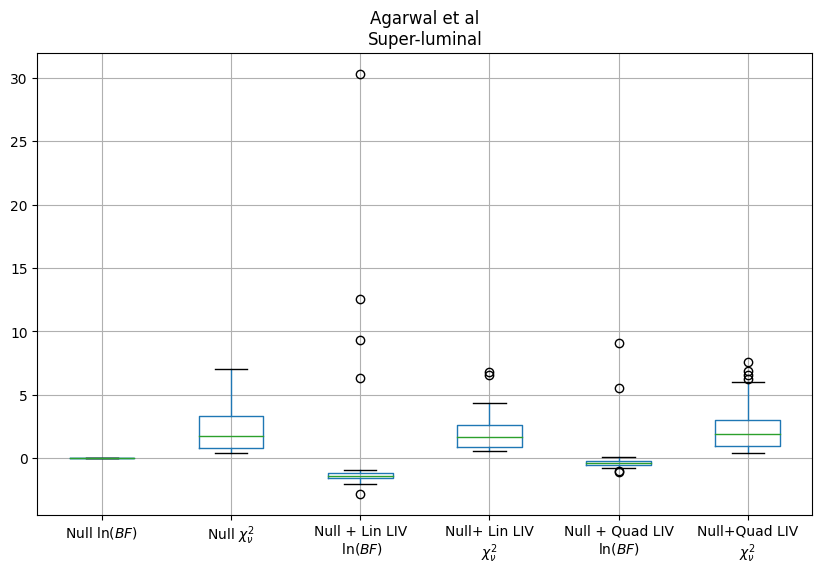

In [18]:
plt.figure(figsize=(10, 6))
temp= final.drop(['GRB', 'E0 (keV)', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Agarwal et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()